# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue">Identificação e Extração de Texto</font>
    
## <font color="blue">Avaliação Solução</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

**RECOMENDAÇÃO MUITO IMPORTANTE**: Para este módulo do curso, recomendamos fortemente utilizar o **Colab** do Google para rodar os notebooks. Para instalar o <font color='blue'>tesseract</font> no Colab basta rodar a célula abaixo.

Se você tiver dificuldade com a instalação, peça ajuda aos monitores.

---

In [1]:
# Bibliotecas que iremos utilizar no módulo

!apt install tesseract-ocr
!apt install tesseract-ocr-por
!apt install libtesseract-dev
!apt install poppler-utils
!pip install pytesseract
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,023 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Os exercícios a seguir farão uso do aquivo <font style="font-family: monaco"> nfe-avaliacao-2024.pdf</font>, que está nos <font style="font-family: monaco">arquivos de apoio.zip</font>, disponível para download no Moodle.

### Exercício 1)
Considere a nota fiscal eletrônica representada no arquivo <font style="font-family: monaco"> nfe-avaliacao-2024.pdf</font>. Converta o arquivo PDF em uma imagem no formato PNG. Utilize o pacote <font color='blue'>PIL</font> para carregar a imagem gerada. Qual a resolução da imagem gerada?

**a) 1653 X 2339**<br>
b) 1024 X 640 <br>
c) 640 X 2339<br>
d) 1001 X 2020


**Dica**: Utilize o atribute `size` do objeto PIL para obter as dimensões da imagem e empregue os parâmetros default do método <font color='blue'>convert_from_path</font> para gerar a imagem.


In [22]:
from pdf2image import convert_from_path
from PIL import Image
import matplotlib.pyplot as plt
filename = 'nfe-avaliacao-2024.pdf'


In [15]:
convert_from_path(filename, 300)

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>]

In [30]:
foto = convert_from_path(filename)

In [31]:
foto[0].size

(1653, 2339)

In [24]:
foto[0].save('nota.png', 'png')

In [25]:
im = Image.open('nota')

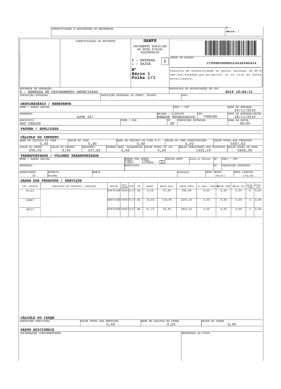

In [26]:
plt.axis('off')
plt.imshow(im)
plt.show()

### Exercício 2)
Aplique OCR para extrair o texto contido na imagem gerada no exercício 1) da avaliação. Qual a primeira sequência de caractares alfanuméricos que aparece quando o comando <font color='blue'>print</font> é aplicado no texto extraído?

a) No:<br>
b) Série: 1 <br>
**c) IDENTIFICAÇÃO E ASSINATURA DO RECEBEDOR**<br>
d) DATA DE RECEBIMENTO<br>

In [32]:
import pytesseract as ocr


In [ ]:
phrase[0]

In [36]:
phrase = ocr.image_to_string(Image.open('nota.png'), lang='por')
print(phrase)

 

 

 

IDENTIFICAÇÃO E ASSINATURA DO RECEBEDOR

 

 

 

 

 

IDENTIFICAÇÃO DO EMITENTE

ELETRÔNICA

O - ENTRADA
1 - SAÍDA
Nº

Série 1
Folha 1/1

 

DOCUMENTO AUXILIAR
DA NOTA FISCAL

 

CHAVE DE ACESSO

 

|

Autorizadora.

173550010000012101043403614

Consulta de autenticidade no portal nacional da NF-e
www.nfe.fazenda.gov.br/portal ou no site da Sefaz

 

NATUREZA DE OPERAÇÃO
S -

REMESSA DE FATURAMENTO ANTECIPADO

 

PROTOCOLO DE AUTORIZAÇÃO DE USO

2019 15:04:31

 

 

 

 

 

 

 

 

 

 

INSCRIÇÃO ESTADUAL INSCRIÇÃO ESTADUAL DO SUBST. TRIBUT. CNPJ

DESTINATÁRIO / REMETENTE

NOME / RAZÃO SOCIAL CNPJ / CPF DATA DE EMISSAO

26/11/2019

ENDEREÇO BAIRRO / DISTRITO CEP DATA DA ENTRADA/SAÍDA
LOTE 227 PARQUE TECNOLOGICO 17500-200 28/11/2019

MUNICÍPIO FONE / FAX UF INSCRIÇÃO ESTADUAL HORA DA SAIDA

SAO CARLOS SP 08:00

 

 

 

 

 

FATURA / DUPLICATA

 

 

CÁLCULO DO IMPOSTO

 

BASE DE CALCULO DO ICMS

VALOR DO ICMS

 

BASE DE CALCULO DO ICMS S.T.

 

VALOR DO ICMS SUBSTITUIÇ

### Exercício 3)
Escreva uma expressão regular para encontrar, no texto extraído no exercício 2), todas as ocorrências de uma sequência com um ou dois dígitos que precedem uma vírgula, a qual é seguida por outra sequência de extamente dois dígitos. Por exemplo: '0,31' e '45,43' são sequências válidas, porém, '345,43' '23,4356' e '1,2' não são. Quantas sequências do tipo procurado foram encontradas?


**a) Menos de 10** <br>
b) Entre 11 e 19<br>
**c) Entre 20 e 29**<br>
d) Mais de 30

**DICA**: Combine os símbolos <font color='blue'>\s, \d, \b</font>

In [37]:
import re


In [50]:
type(phrase)

str

In [51]:
regex = r'\d{2},\d{2}'
p = re.compile(regex + re.escape(phrase), re.IGNORECASE)

In [55]:
len(re.findall(r'\d{2},\d{2}', phrase))

15

In [56]:
regex = r'\b\d{2},\d{2}\b'
len(re.findall(regex, phrase))

4

### Exercício 4)
Escreva uma expressão regular para encontrar palavras no texto extraído no exercício 2) da avaliação que contenham a sequência 'ITO','STO', ou 'UTO'. Por exemplo, 'IMPOSTO' e 'PRODUTOS' são resultados válidos. Quantas palavras **distintas** foram encontradas?

a) Menos que 5 <br>
**b) Entre 5 e 7**<br>
c) Entre 8 e 10<br>
d) Mais 10

**OBS 1**: Considere apenas as sequências onde 'ITO','STO', ou 'UTO' aparecem com letras maiúsculas.

**OBS 2**: Preste atenção para não contar mais de uma vez cada palavra. Você pode utilizar o comando <font color='blue'> set </font> para extrair as palavras distintas da lista de palavras encontradas.

In [66]:
regex = r'\b\w*(?:ITO|STO|UTO)\w*\b'
ocorrencias = re.findall(regex, phrase)
print(set(ocorrencias))

{'BRUTO', 'DISTRITO', 'IMPOSTO', 'PRODUTOS', 'AUTORIZAÇÃO', 'PRODUTO', 'TRIBUTOS'}


### Exercício 5)
O texto da célula abaixo foi obtido aplicando OCR em um documento PDF. Como pode ser notado, o OCR gerou alguns caracteres errados, principalmente a letra "v" da palavra "valor", que, por alguma razão, pode não ter sido corretamente reconhecida pelo OCR. Note que em alguns casos a letra "v" nem foi identificada, resultando em "alor", o que também foi um erro do OCR.

Encontre todas as ocorrências da palavra "valor" e suas variações (como "valores" e "valorizado"), considerando os erros de identificação do OCR. Quantas ocorrências distintas foram encontradas (distintas significa não considerar a mesma palavra mais que uma vez)?

**a) Menos de 11**<br>
b) 12<br>
c) 13<br>
d) 14

**Dica**: utilize o símbolo '\w' combinado com '[ ]', '*' e '+'. Veja documentação [aqui](https://docs.python.org/3/library/re.html).

In [1]:
texto_from_ocr = "O valor e um conceito fundamental em diversas areas \
da vida, desde a economia ate a filosofia. O valor pode ser entnndido \
como a importancia ou significado atribuído a algo ou alguém, podendi \
ter diferentes conotações. Na área econômica, o ualor pode ser entendido \
como o preço que um produto ou serviço possui. Um produto pode ser \
valorado a partir de fatores externos, como mudanças na economia ou \
nas tendências de consumo. Na área social, o alor pode ser entendido \
como a importancia que uma sociedade atribui a determinados \
comportamentos ou valores morais. Esses jalores podem variar de acordo \
com a cultura ou época histórica. Valoros como a honestidade, \
a solidariedade, a tolerância e o respeito são exemplos de valores \
sociais que são considerados importantes em muitas culturas.\
Na área pessoal, valorizar a importancia de cada indivíduo frente a \
diferentes aspectos de sua vida é fundamental. \
Cada pessoa tem seus próprios valores e prioridades, e esses ualores \
podem influenciar decisões e escolhas. Valorizar a liberdade, \
a felicidade, a realização pessoal e o equilíbrio entre vida pessoal e\
profissional podem ser importante para diferentes pessoas. \
Em resumo, o kalor é um conceito amplo e multifacetado, que está \
presente em diversas áreas da vida. É importante refletir sobre quais \
são os nossos valores e prioridades, e como eles podem nos ajudar a \
alcançar nossos objetivos e viver uma vida mais significativa."

In [2]:
import re


In [9]:
regex = r'\b\w*alor\w*'
set(re.findall(regex, texto_from_ocr)),len(set(re.findall(regex, texto_from_ocr)))

({'Valorizar',
  'Valoros',
  'alor',
  'jalores',
  'kalor',
  'ualor',
  'ualores',
  'valor',
  'valorado',
  'valores',
  'valorizar'},
 11)